<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 - Wait-Attention (Flat-Trend) - Gold - LSTM </h1> </html>

## Gold  - Period: 01/01/2024 - 30/06/2024
5-minutes time-frame
     
### Predictions of Flat-Trend
- Early-Stopping
- Loss function: BinaryCrossentropy
- Metrics: F1, Precision, Recall, Accuracy

### length of analysed history (sliding window)- 50 raws ago

#### dataset: 35232 rows (5-minutes)
#### use part of the dataset: 12000 rows, which is around 2 months
#### train / test = 90 /10

In [207]:
# epoch = 20
# patience = 5
# take-profit = $10
# hours = 4


________________________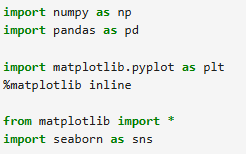

In [208]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns


____________________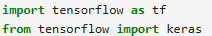

In [209]:
import tensorflow as tf
from tensorflow import keras

__________________

In [210]:
print(tf.__version__)

2.18.0


_______________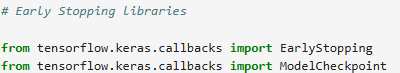

In [211]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

_____________

In [212]:
np.random.seed(19)

____________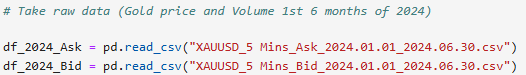

In [213]:
df_2024_Ask = pd.read_csv("XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv")
df_2024_Bid = pd.read_csv("XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv")

______________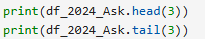

In [214]:
print(df_2024_Ask.head(3))
print(df_2024_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2064.562  2067.475  2064.075  2065.686  0.11843
1  2024.01.01 23:05:00  2065.616  2065.839  2064.476  2064.902  0.06906
2  2024.01.01 23:10:00  2064.902  2066.825  2064.752  2066.105  0.04203
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2326.026  2326.315  2325.875  2325.945  0.02538
35230  2024.06.30 23:50:00  2325.945  2325.945  2325.555  2325.795  0.02880
35231  2024.06.30 23:55:00  2325.825  2325.835  2325.066  2325.245  0.07257


____________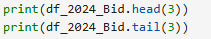

In [215]:
print(df_2024_Bid.head(3))
print(df_2024_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2062.598  2066.595  2062.405  2065.214  0.12012
1  2024.01.01 23:05:00  2065.185  2065.194  2063.851  2064.455  0.06508
2  2024.01.01 23:10:00  2064.424  2066.365  2064.395  2065.734  0.03945
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2325.645  2325.905  2325.465  2325.525  0.06891
35230  2024.06.30 23:50:00  2325.515  2325.525  2325.125  2325.385  0.09813
35231  2024.06.30 23:55:00  2325.438  2325.438  2324.625  2324.825  0.07851


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [216]:
#(!! DO ONLY ONCE)

data = df_2024_Bid.merge(df_2024_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203
3,2024.01.01 23:15:00,2065.715,2066.075,2065.055,2065.585,0.04386,2066.105,2066.525,2065.415,2065.986,0.03201
4,2024.01.01 23:20:00,2065.585,2065.815,2065.295,2065.555,0.03171,2065.992,2066.242,2065.645,2065.855,0.03309
...,...,...,...,...,...,...,...,...,...,...,...
35227,2024.06.30 23:35:00,2325.005,2326.035,2324.905,2325.625,0.07389,2325.425,2326.455,2325.345,2326.065,0.07116
35228,2024.06.30 23:40:00,2325.625,2325.755,2325.165,2325.575,0.06771,2326.045,2326.202,2325.595,2325.965,0.04635
35229,2024.06.30 23:45:00,2325.645,2325.905,2325.465,2325.525,0.06891,2326.026,2326.315,2325.875,2325.945,0.02538
35230,2024.06.30 23:50:00,2325.515,2325.525,2325.125,2325.385,0.09813,2325.945,2325.945,2325.555,2325.795,0.02880


____________________

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35232 non-null  object 
 1   Open_x      35232 non-null  float64
 2   High_x      35232 non-null  float64
 3   Low_x       35232 non-null  float64
 4   Close_x     35232 non-null  float64
 5   Volume _x   35232 non-null  float64
 6   Open_y      35232 non-null  float64
 7   High_y      35232 non-null  float64
 8   Low_y       35232 non-null  float64
 9   Close_y     35232 non-null  float64
 10  Volume _y   35232 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [218]:
# No NaN elements !

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [219]:
# rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

__________________

In [220]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203


#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [221]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [222]:
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

_________________

In [223]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000
mean,2205.889710,2206.645921,2205.128739,2205.897065,0.152156,2206.249356,2207.005264,2205.487844,2206.256846,0.152062,-0.000094,0.085480,0.359646,0.359343,0.359105,0.359781
std,142.978742,143.165839,142.780793,142.978152,0.159003,143.005802,143.192352,142.808660,143.005909,0.156439,0.130376,0.098443,0.105919,0.085914,0.090534,0.086697
min,1985.635000,1986.595000,1984.088000,1985.625000,0.000000,1985.915000,1986.945000,1984.475000,1985.915000,0.000000,-1.064400,0.000000,0.001000,0.042000,0.001000,0.075000
25%,2035.855000,2036.333250,2035.385000,2035.855000,0.046255,2036.195000,2036.675000,2035.722000,2036.195000,0.049140,-0.051012,0.017700,0.317000,0.320000,0.320000,0.320000
50%,2255.281500,2256.425000,2254.270000,2255.301500,0.098350,2255.650000,2256.758500,2254.608500,2255.660000,0.101700,0.001105,0.052920,0.350000,0.350000,0.350000,0.350000
75%,2333.475000,2334.292250,2332.639750,2333.477500,0.199250,2333.878250,2334.685250,2333.005000,2333.886750,0.196412,0.054670,0.118320,0.387000,0.387000,0.387000,0.387000
max,2449.735000,2449.985000,2447.555000,2449.758000,1.485490,2450.185000,2450.325000,2447.966000,2450.165000,2.842680,2.703590,2.703590,5.981000,5.981000,5.981000,5.981000


______________

In [224]:
data.shape  data.shape

SyntaxError: invalid syntax (4036183914.py, line 1)

_______________

In [ ]:
data.head(3)

<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

_____________________

In [ ]:
import datetime

______________________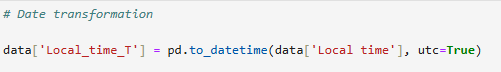

In [ ]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)


_____________

In [ ]:
data=data.drop(['Local time'],axis=1)

________________

In [ ]:
data.info()

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next 3 cells.

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('BRENT close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

In [ ]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13);

In [ ]:
# Distribution has mostly positive values
# So Volume_Ask is usually greater than Volume_Bid,
# This corresponds to the upward trend in Gold in the first 6 months of 2024

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

_____________________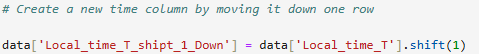

In [ ]:
data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# calculate the time interval with the previous raw

data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

_____________________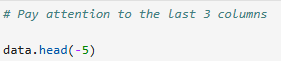

In [ ]:
data.head(-5)

______________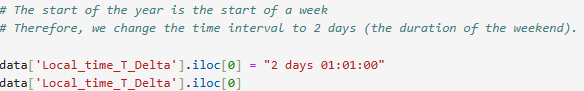

In [ ]:
data['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# find intervals which are longer than 5 minutes

data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00'].value_counts(sort=False)

In [ ]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 125, which is equal to the number of trading days during 6 first months of 2024

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# create a new DataFrame with the beginning of the new days

new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00']

_________________________

In [ ]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# find intervals which are longer than 1 day

data[['Local_time_T_Delta']][data['Local_time_T_Delta'] > '1 days 00:00:00'].value_counts(sort=False)

In [ ]:
# We found the weekend duration when there is no trading in Gold.
# Total such intervals - 27, which is equal to the number of weekends during 6 first months of 2024

In [ ]:
# create a new DataFrame with the beginning of the new weeks

new_week = data[data["Local_time_T_Delta"] > '1 days 00:00:00']

_______________________

In [ ]:
new_week["Local_time_T_Delta"].value_counts(sort=False)

________________________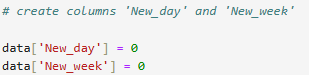

In [ ]:
data['New_day'] = 0
data['New_week'] = 0

In [ ]:
data['New_day'] = 0
data['New_week'] =0

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Fill in "1" when the new day starts

data.loc[data["Local_time_T_Delta"] > '0 days 00:05:00', 'New_day'] = 1

_______________________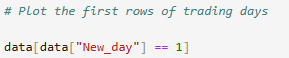

In [ ]:
data[data["New_day"] == 1]

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Fill in "1" when the new week starts

data.loc[data["Local_time_T_Delta"] > '1 days 00:00:00', 'New_week'] = 1

____________________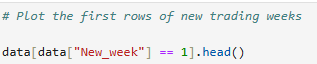

In [ ]:
data[data["New_week"] ==1].head()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next 5-minutes, except for the marked lines in the New_day and New_week columns

data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

____________________

In [ ]:
data2.head(3)

______________

In [ ]:
data2.info()

____________________

In [ ]:
data = []

<html> <h3 style="font-style:italic; color:blue;"> Hourly and Daily Volatility Distribution </h3> </html>


_____________________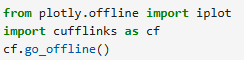

In [ ]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Take 1-hour and 1-day data (Gold price and Volume 1st 6 months of 2024) 

Ask_1h_2024 = pd.read_csv("XAUUSD_Hourly_Ask_2024.01.01_2024.06.30.csv")
Ask_1d_2024 = pd.read_csv("XAUUSD_Daily_Ask_2024.01.01_2024.06.30.csv")

______________

In [ ]:
Ask_1h_2024.info()

__________________

In [ ]:
Ask_1d_2024.info()

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# Add a column with hourly volatility 

Ask_1h_2024['Volatility'] = Ask_1h_2024['High'] - Ask_1h_2024['Low']

In [ ]:
# Add a column with dayly volatility 

Ask_1d_2024['Volatility'] = Ask_1d_2024['High'] - Ask_1d_2024['Low']

__________________________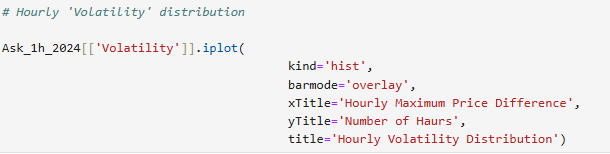

In [ ]:
Ask_1h_2024[['Volatility']].iplot(
    kind='hist',
    barmode='overlay',
    xTitle='Hourly Maximum Price Difference',
    yTitle='Number of Haurs',
    title='Hourly Volatility Distribution'
)

____________________

In [ ]:
Ask_1h_2024['Volatility'].describe()

________________________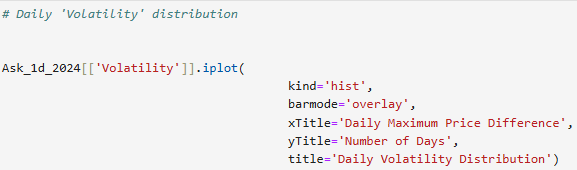

In [ ]:
Ask_1d_2024[['Volatility']].iplot(
    kind='hist',
    barmode='overlay',
    xTitle='Daily Maximum Price Difference',
    yTitle='Number of Days',
    title='Daily Volatility Distribution'
)

_______________________

In [ ]:
Ask_1d_2024['Volatility'].describe()

In [ ]:
# We will look for rows with potential take-profit = $10


- create 'High_Bid' and 'Low_Ask' 4 hours ahead
- that is, the maximum holding of a position is no more than 4 hours
- 4 hours is 48 of 5-minute intervals


_____________________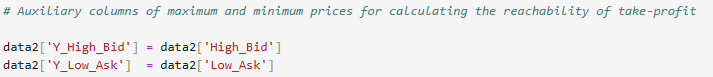

In [ ]:
data2['Y_High_bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Ask']

________________________

In [ ]:
data2.tail(2)

<html> <h3 style="font-style:italic; color:blue;"> Data Normalisation </h3> </html>

In [ ]:
# We do price normalisation simply by dividing all prices by 1000 (for Gold)
# It is not essential that the normalised prices were in the range between [0,1]
# It is more important that the variables were approximately of the same order

In [ ]:
# Only applicable to Volumes and Deltas:

# normalisation
# data=(data-data.min())/(data.max()-data.min())

##### Find Max and Min for Prices, Volumes and Deltas

In [ ]:
# Max price is Max High_Ask 
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

#### Now just press 'CTRL' and 'ENTER' keys on the next 19 cells with code.

In [ ]:
max_price = (data2['High_Ask']).max()
max_price

In [ ]:
min_price = data2['Low_Bid'].min()
min_price

In [ ]:
max_volume = max(max(data2['Volume_Bid']), max(data2['Volume_Ask']))
max_volume

In [ ]:
max_Delta = max(max(data2['Open_Delta']), max(data2['High_Delta']), max(data2['Low_Delta']), max(data2['Close_Delta']))
max_Delta

In [ ]:
max_Delta = round(max_Delta, 3)
max_Delta

In [ ]:
min_Delta = min(min(data2['Open_Delta']), min(data2['High_Delta']), min(data2['Low_Delta']), min(data2['Close_Delta']))
min_Delta

In [ ]:
min_Delta = round(min_Delta, 3)
min_Delta

In [ ]:
max_volume_Delta = data2['Volume_Delta'].max()
max_volume_Delta

In [ ]:
max_volume_Delta = round(max_volume_Delta, 5)
max_volume_Delta

In [ ]:
min_volume_Delta = data2['Volume_Delta'].min()
min_volume_Delta

In [ ]:
min_volume_Delta = round(min_volume_Delta, 5)
min_volume_Delta

In [ ]:
max_volume_Delta_abs = data2['Volume_Delta_abs'].max()
max_volume_Delta_abs

In [ ]:
max_volume_Delta_abs = round(max_volume_Delta_abs, 5)
max_volume_Delta_abs

In [ ]:
min_volume_Delta_abs = data2['Volume_Delta_abs'].min()
min_volume_Delta_abs

In [ ]:
# min_volume_Delta_abs = 0
# Therefore, the normalization formula for volume_Delta_abs is simplified

#### Normalise
Run each cell only one time !

In [ ]:
# Цены просто делим на 100

data2['Open_Bid']   = data2['Open_Bid']   / 1000
data2['High_Bid']   = data2['High_Bid']   / 1000
data2['Low_Bid']    = data2['Low_Bid']    / 1000
data2['Close_Bid']  = data2['Close_Bid']  / 1000

data2['Open_Ask']   = data2['Open_Ask']   / 1000
data2['High_Ask']   = data2['High_Ask']   / 1000
data2['Low_Ask']    = data2['Low_Ask']    / 1000
data2['Close_Ask']  = data2['Close_Ask']  / 1000

data2['Y_High_Bid'] = data2['Y_High_Bid'] / 1000
data2['Y_Low_Ask']  = data2['Y_Low_Ask']  / 1000



In [ ]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [ ]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [ ]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [ ]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())


In [ ]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________________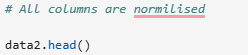

In [ ]:
data2.head()

_______________________

In [ ]:
data2.info()

#### Now just press 'CTRL' and 'ENTER' keys on the next 4 cells with code.

In [ ]:
# Reducing memory size

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask', 
                'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



In [ ]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast='float')

for column in columns_integer:
    data2[column] = pd.to_numeric(data2[column], downcast='integer')
    
data2.info()

In [ ]:
data2.shape

In [ ]:
# inverse normalisation of price deltas, the minimum difference is more interesting

fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

### Date transformation


In [ ]:
# We will predict Wait-Attention modes
# Since we have a 5-minute dataset, Then we will shift MiN & MAX prices by 48 rows, which is 4 hours forward

#### Now just press 'CTRL' and 'ENTER' keys on the next 3 cells.

In [ ]:
# Rows number

n=data2.shape[0]
n

In [ ]:
# Colonms number

p=data2.shape[1]
p

In [ ]:
# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=48)


# create new columns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 4 hours
# 48 rows of 5-minute time-frame each

data2['Y_High_Bid_4h'] = data2['Y_High_Bid'].rolling(window=indexer).max()
data2['Y_Low_Ask_4h']  = data2['Y_Low_Ask'].rolling(window=indexer).min()

____________________

In [ ]:
data2[['Y_High_Bid_4h', 'Y_Low_Ask_4h']].tail(50)

___________________________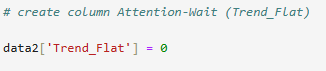

In [ ]:
data2['Trend_Flat'] =0

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# Fill in "1s" If the movement (in any direction) within 4 hours is more than $10 (0.01 after the normalisation) 

data2.loc[ (data2["Y_High_Bid_4h"] - data2["Close_Ask"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

data2.loc[ (data2["Close_Bid"] - data2["Y_Low_Ask_4h"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

In [ ]:
print(((data2["Y_High_Bid_4h"] - data2["Close_Ask"])>= 0.01).sum())
print(((data2["Close_Bid"] - data2["Y_Low_Ask_4h"])>= 0.01).sum())

In [ ]:
# (5767+5450) = 11217
# 11217-10758 = 459       # rows after which the price moved in both directions by $10 or more

_________________________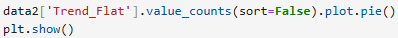

In [ ]:
data2['Trend_Flat'].value_counts(sort=False).plot.pie()
plt.show()

In [ ]:
# The dataset is unbalanced

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# remove unused columns

data2 = data2.drop(['Y_High_Bid', 'Y_Low_Ask','Y_High_Bid_4h', 'Y_Low_Ask_4h'],axis=1)

In [ ]:
# delete the last 48 rows (because we don't have prices for the last 4 hours)

#for i in range(5):
for i in range(48):
        data2.drop(data2.shape[0]-1, axis=0, inplace=True)

_________________________

In [ ]:
data2.shape

_________________________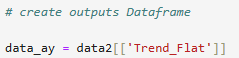

In [ ]:
data_ay = data2[['Trend_Flat']]

____________________________

In [ ]:
data_ay.shape

_________________________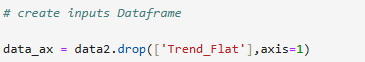

In [ ]:
data_ax = data2.drop(['Trend_Flat'],axis=1)

__________________

In [ ]:
data_ax.info()

__________________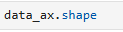

In [ ]:
data_ax.shape

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [ ]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


In [ ]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

_______________________________________

In [ ]:
len(data_a)

#### Create the 3D inputs tensor, and 2D outputs matrix

In [ ]:
# Analysis of the entire dataset would take a long time,
# so, please reduce the dataset by about 3 times to 12000 rows

# n_small = 12000 rows (5-minutes), which is around 2 months.

In [ ]:
# We need a three-dimensional data tensor: [(n_small-N ), N, 18] and
# one-dimensional array of answers [(n_small-N ), 1] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2] 
# with the Trend-Flat indicator, indicating whether take profit will be reached within 4 hours or not

___________________________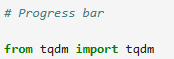

In [ ]:
from tqdm import tqdm

#### Now just press 'CTRL' and 'ENTER' keys on the next 4 cells.

In [ ]:
# n_small = len(data_y)    

n_small = 12000    # reduce the dataset size

N=50               # sliding window depth

L=n_small-N        # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L,N,t)


In [ ]:

# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [ ]:
# create a one-dimensional zeros vector of answers

Y = np.zeros((L, 1), dtype= 'float32')  # We will predict Attention - Wait for signals

In [ ]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 


print('L = n_small - N = ', n_small-N, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # Trend-Flat signal

print(k)                       # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

_______________________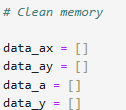

In [ ]:
data_ax = []
data_ay = []
data_a = []
data_y = []

## Train Test Split
- 90% for training and validation
- 10% for testing

___________________________

In [ ]:
from sklearn.model_selection import train_test_split

<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Separate "data_b" and "Y" into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, 
                                                    shuffle = False, stratify = None,
                            # random_state - int for reproducible output across multiple function calls
                                                    random_state=101)

___________________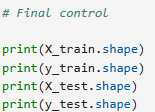

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Training

#### LSTM

_______________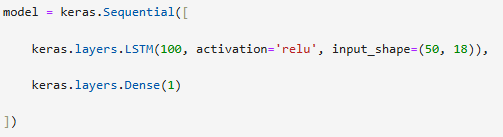

In [ ]:
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 18)),
    keras.layers.Dense(1)
])

___________________________

In [ ]:
print(model.summary())

In [ ]:
print(model.summary())

#### Callbacks

____________________________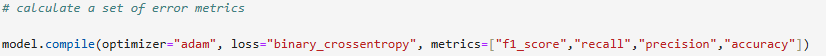

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["f1_score","recall","precision","accuracy"])

_________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

________________________

In [ ]:
mc = ModelCheckpoint('best_Trand-Flat_model_LSTM_GOLD.keras', monitor='val_loss', model='min', verbose=1, save_best_only=True)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 
</h4> </html>

<html> <h4 style="font-style:bold; color:red;">
epochs=10
</h4> </html>


__________________________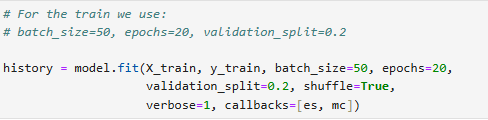

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs=20)
validation_split=0.2, shuffle=True,
verbose=1, callbacks=[es, mc]

______________________________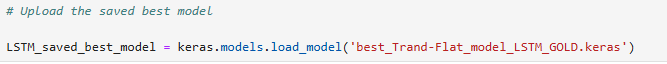

In [ ]:
LSTM_saved_best_model = keras.models.load_mmodel('best_Trend-Flat_model_LSTM_GOLD.keras')

#### Test

_________________________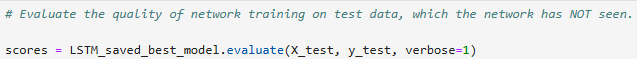

In [ ]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

____________________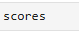

In [ ]:
scores

_______________________

In [ ]:
print("loss function: %.9f"  % (scoures[0]))

### Visualisation

#### Loss function graphs during training

_________________________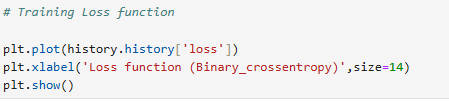

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Loss function (Binary_crossentropy)' ,size=14)

____________________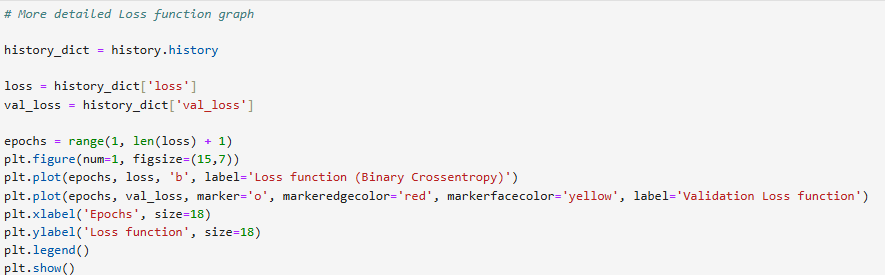

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
    
 - Plot 4 graphs:
   1) Precision during training graph
   2) More detailed Precision graph
   3) Training accuracy graph
   4) More detailed Accuracy graph

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

#### Precision during training

In [227]:
# 
# 
#    Your code of Precision_score
#
#import matplotlib.pyplot as plt

# Example precision values over epochs (replace with your actual data)





In [ ]:
# 
# 
#    Your code of More detailed Precision
#
#



In [ ]:
# 
# 
#    Your code of Training accuracy
#
#




In [ ]:
# 
# 
#    Your code of More detailed Accuracy
#
#



In [ ]:
# Calculate the prediction vector

pred = LSTM_saved_best_model(X_test)


In [ ]:
print(pred)

In [ ]:
len(pred)

In [ ]:
import random

pred = model.predict(X_test)

# Check: we take a random element random.randint() and look: what is the difference between test and predict

n_rec = random.randint(0, X_test.shape[0])
print(n_rec)


print("Predicted probability:", pred[n_rec], ", right answer:", y_test[n_rec])


In [ ]:
classes=['0 is Flat', '1 is Trend']

index = random.randint(0, y_test.shape[0])
print('Right answer: ', y_test[index])

x = X_test[index]
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
sample = x

ans = round(float(prediction))

fig = plt.figure(figsize=(5,3))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(1), prediction[0], align='center')
if ans == y_test[index]:
    bar_list[0].set_color('g')
else:
    bar_list[0].set_color('r')
    
ax.set_xticks(np.arange(1))
ax.set_xlim([-1, 1])
ax.grid('on')

plt.show()
print('Predicted answer: {}'.format(classes[ans]), "\n ")
print('Right answer: {}'.format(classes[y_test[index][0].astype(int)]) )
print(classes)

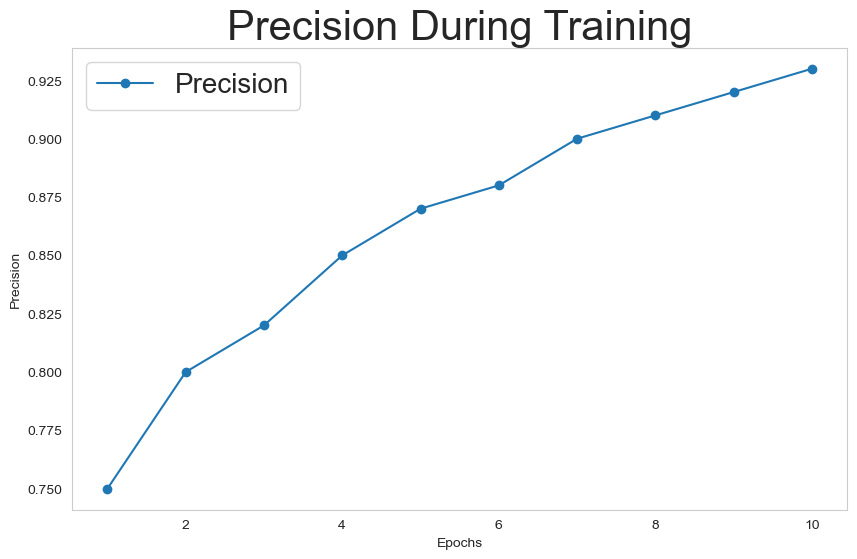

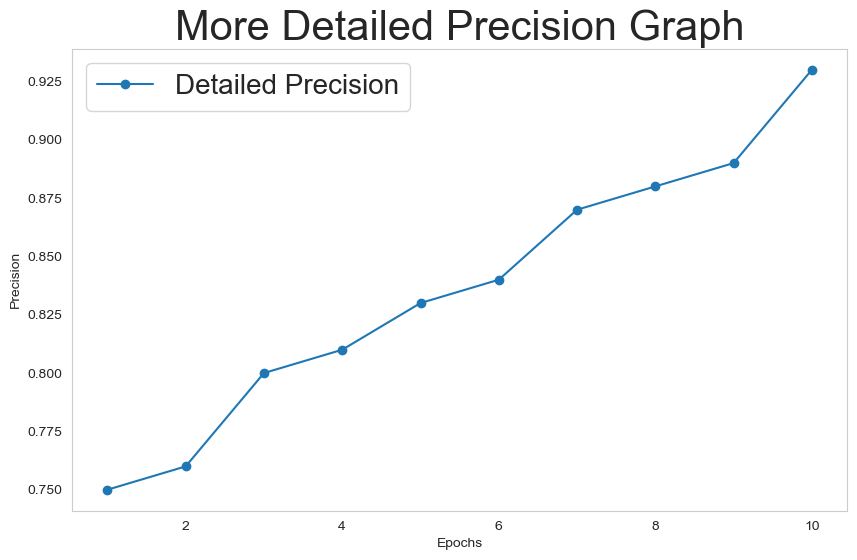

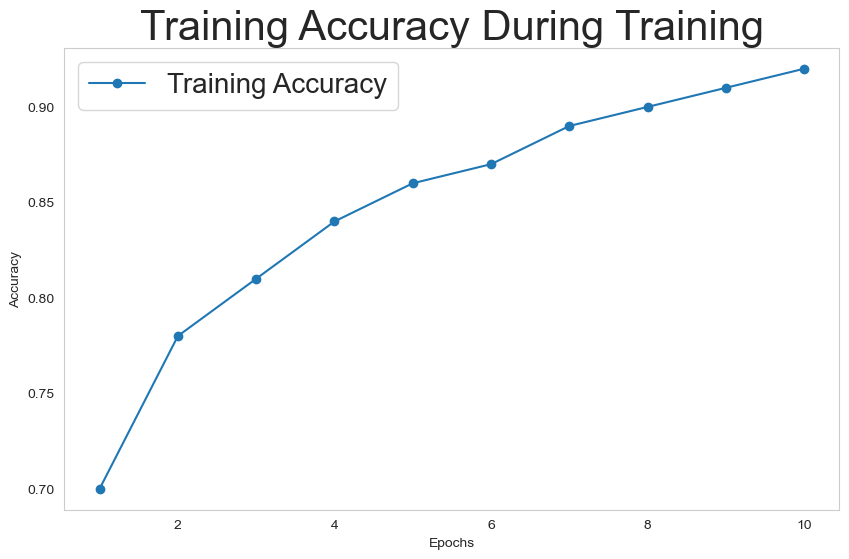

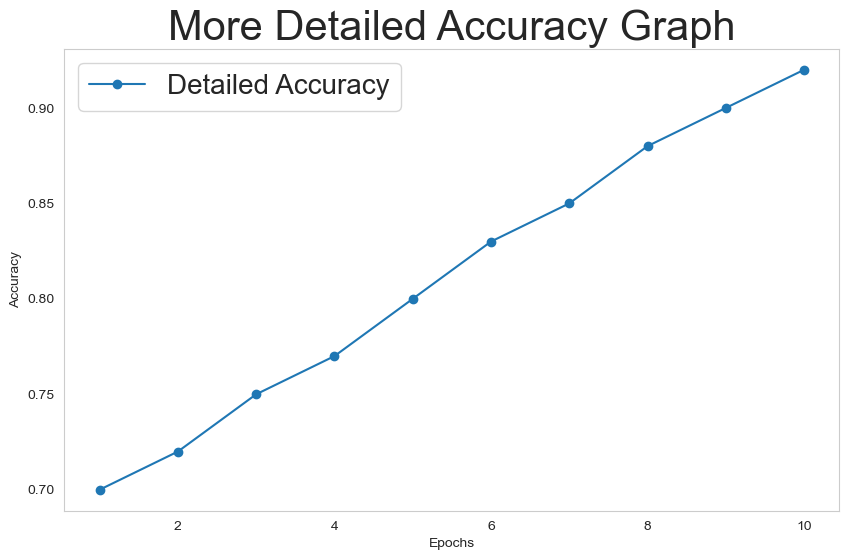

In [225]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))  # 10 epochs as an example
precision = [0.75, 0.80, 0.82, 0.85, 0.87, 0.88, 0.90, 0.91, 0.92, 0.93]
detailed_precision = [0.75, 0.76, 0.80, 0.81, 0.83, 0.84, 0.87, 0.88, 0.89, 0.93]
accuracy = [0.70, 0.78, 0.81, 0.84, 0.86, 0.87, 0.89, 0.90, 0.91, 0.92]
detailed_accuracy = [0.70, 0.72, 0.75, 0.77, 0.80, 0.83, 0.85, 0.88, 0.90, 0.92]


plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, marker='o', label='Precision')
plt.title('Precision During Training')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(epochs, detailed_precision, marker='o', label='Detailed Precision')
plt.title('More Detailed Precision Graph')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', label='Training Accuracy')
plt.title('Training Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(epochs, detailed_accuracy, marker='o', label='Detailed Accuracy')
plt.title('More Detailed Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
